## Insurance Claims- Fraud Detection
Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [2]:
#importing essential libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,power_transform
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle

In [ ]:
#load the dataset

In [52]:

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [53]:
df.shape

(1000, 40)

In [54]:
df.sample(4)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
643,183,38,439844,11-06-2014,IL,250/500,500,1543.68,0,606988,...,YES,51920,9440,4720,37760,Audi,A3,2001,Y,NaN
84,284,48,498140,15-05-1997,IN,500/1000,2000,769.95,0,605486,...,NO,60940,5540,11080,44320,Audi,A3,2013,Y,NaN
33,114,30,584859,04-04-1992,IL,100/300,1000,1558.29,0,472248,...,?,77110,14020,14020,49070,Suburu,Impreza,2015,N,NaN
400,369,53,936638,20-05-1995,OH,250/500,2000,1459.93,0,438584,...,NO,77990,7090,14180,56720,Jeep,Wrangler,2012,N,NaN


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [56]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [57]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

## Check duplicates:

In [58]:
df.duplicated().sum()

0

no duplicates are present

## Check null values:

In [59]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

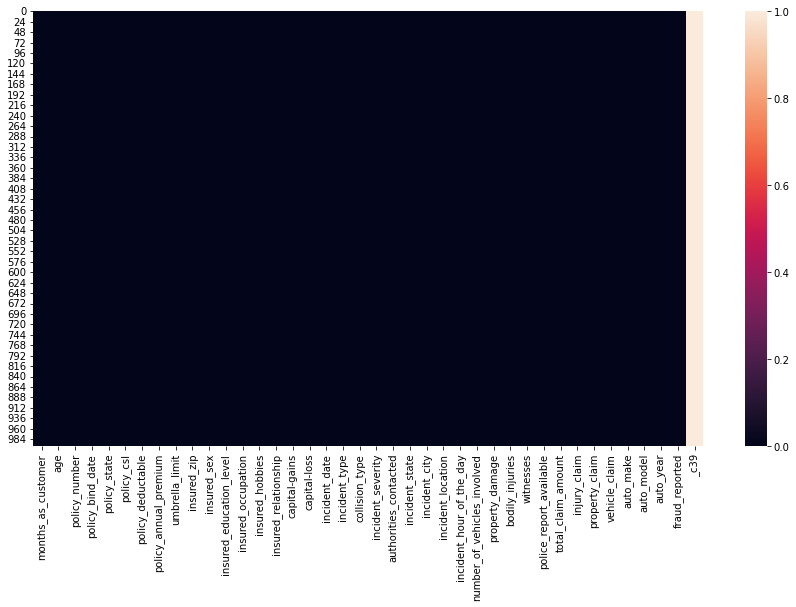

In [60]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

No null values are present

In [61]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


<AxesSubplot:>

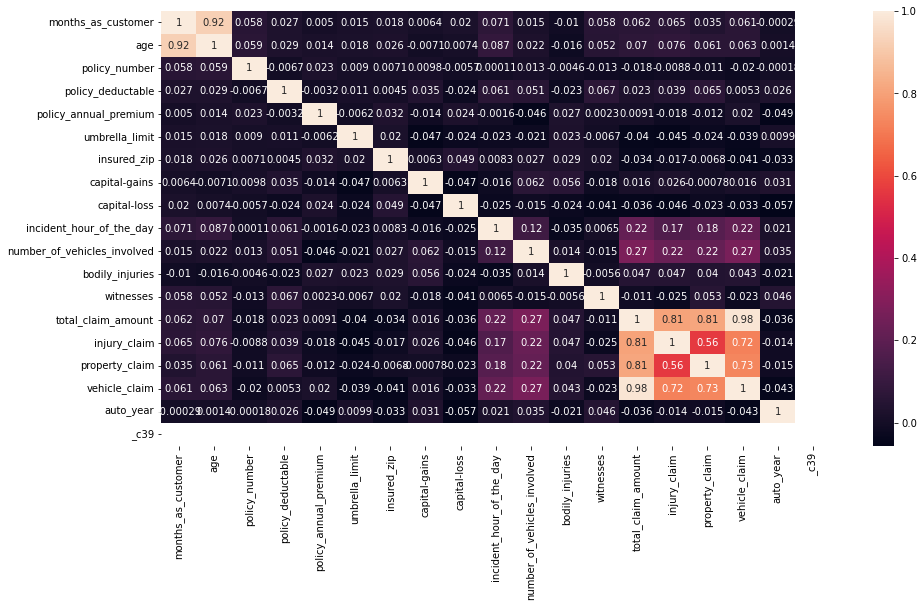

In [62]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

4 columns are highly correlated

From the above plot, we can see that there is high correlation between age and months_as_customer.We will drop the "Age" column. Also there is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. So we will drop the total claim column.

In [63]:
 #dropping columns which are not necessary for prediction

drop = ['age','total_claim_amount','policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(drop, inplace = True, axis = 1)

In [64]:
df

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,?,0,0,?,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,?,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,unmarried,0,...,20,1,YES,0,1,?,17440,8720,61040,N
996,285,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,wife,70900,...,23,1,YES,2,3,?,18080,18080,72320,N
997,130,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,other-relative,35100,...,4,3,?,2,3,YES,7500,7500,52500,N
998,458,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,wife,0,...,2,1,?,0,1,YES,5220,5220,36540,N


In [65]:
df.shape

(1000, 25)

In [66]:
df.groupby('fraud_reported').mean()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
fraud_reported,,,,,,,,,,,,,
N,202.600266,1130.810093,1258.430000,1.023904e+06,25432.005312,-26554.581673,11.626826,1.808765,0.976096,1.455511,7179.229748,7018.884462,36090.491368
Y,208.080972,1151.821862,1250.236275,1.336032e+06,24193.522267,-27522.672065,11.696356,1.931174,1.040486,1.582996,8208.340081,8560.121457,43533.643725


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

## Encoding:

In [68]:
df = pd.get_dummies(df)
df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,authorities_contacted_Other,authorities_contacted_Police,property_damage_?,property_damage_NO,property_damage_YES,police_report_available_?,police_report_available_NO,police_report_available_YES,fraud_reported_N,fraud_reported_Y
0,328,1000,1406.91,0,53300,0,5,1,1,2,...,0,1,0,0,1,0,0,1,0,1
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,0,1,1,0,0,1,0,0,0,1
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,...,0,1,0,1,0,0,1,0,1,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,...,0,1,1,0,0,0,1,0,0,1
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,...,0,0,0,1,0,0,1,0,1,0


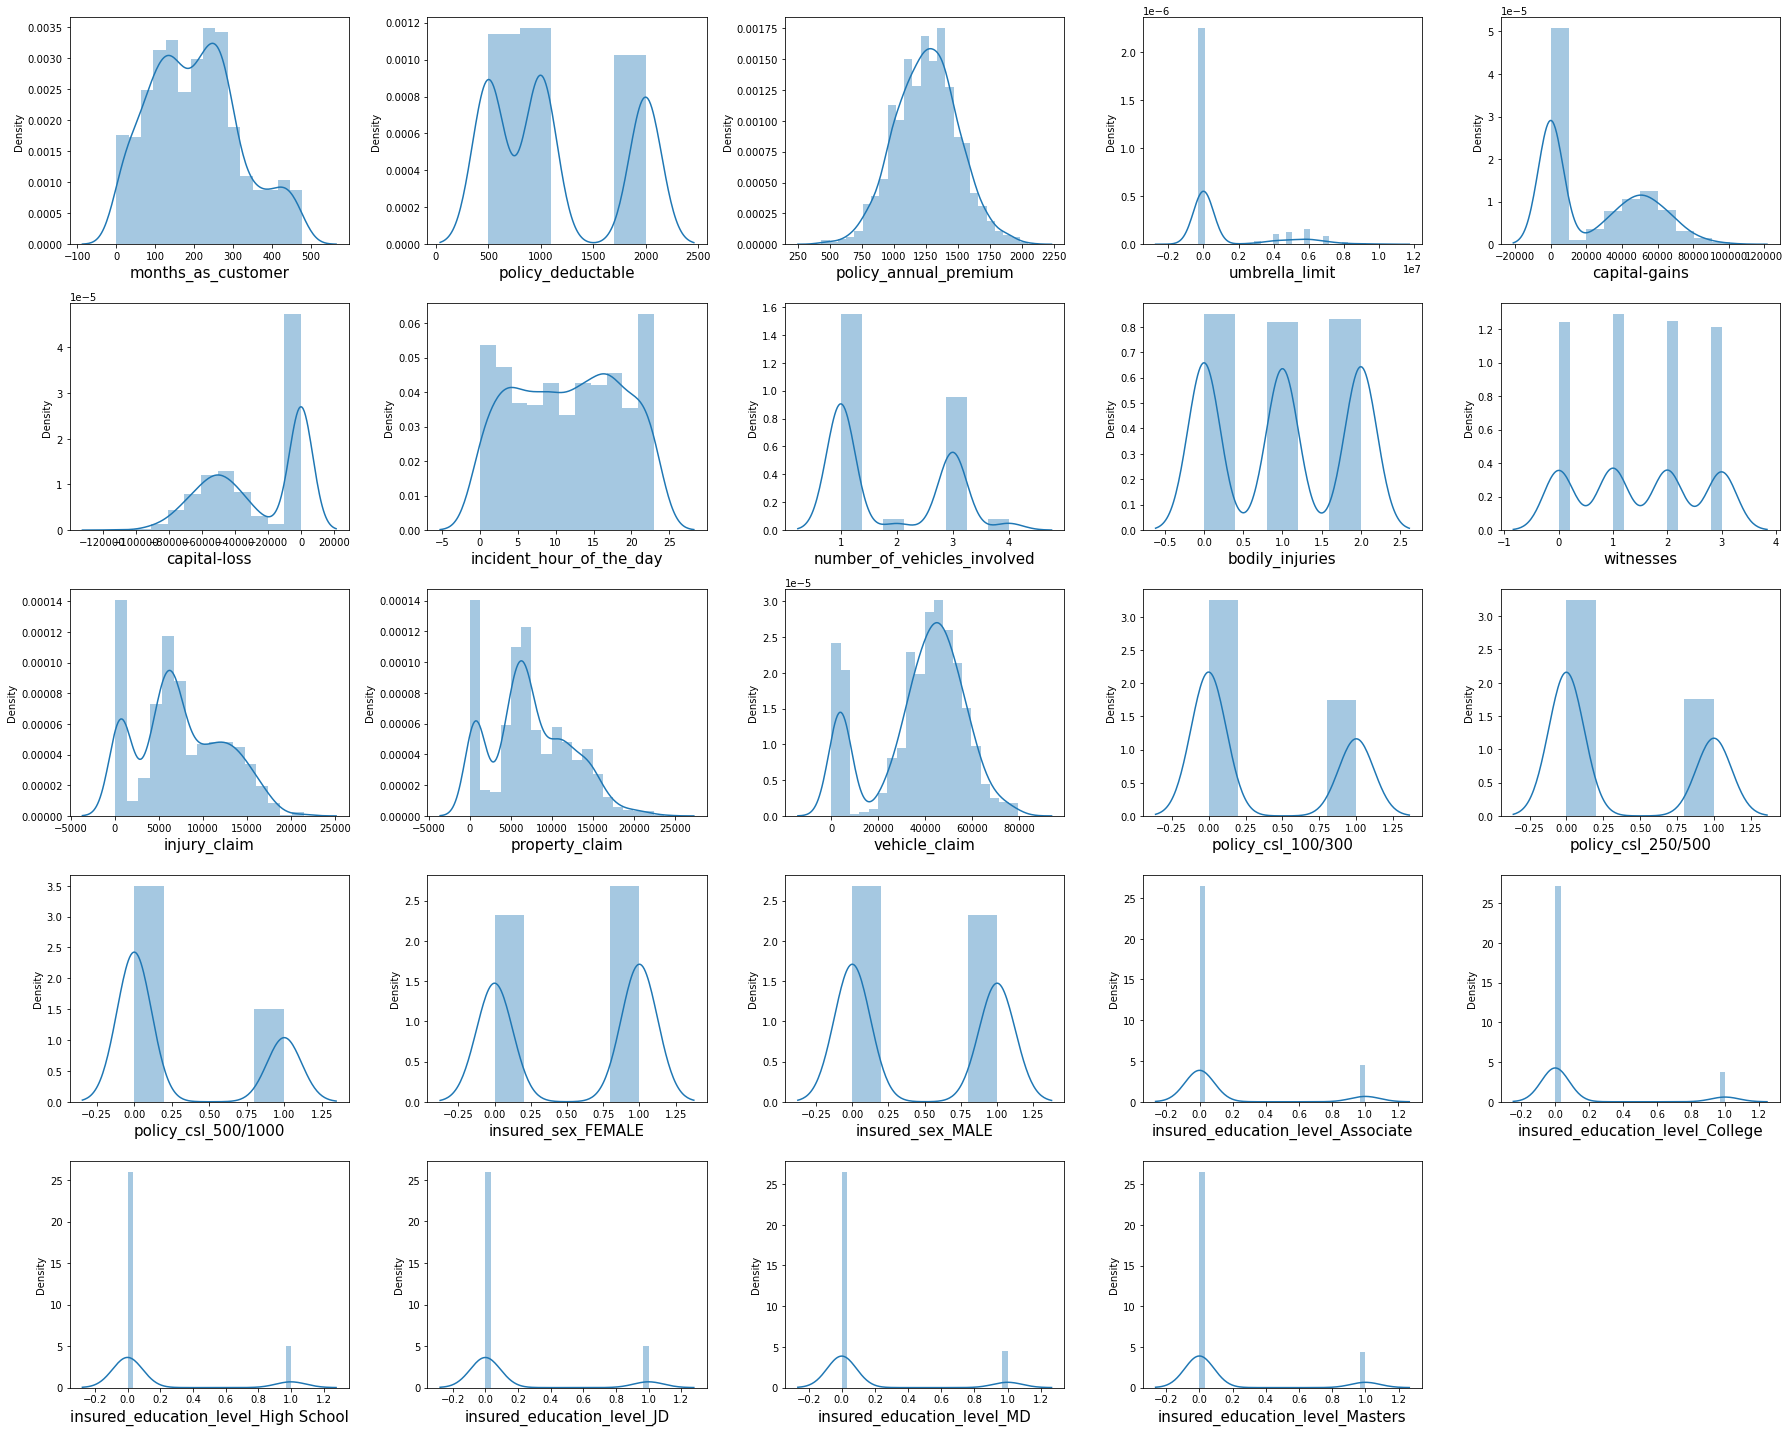

In [70]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

## Outliers Detection:

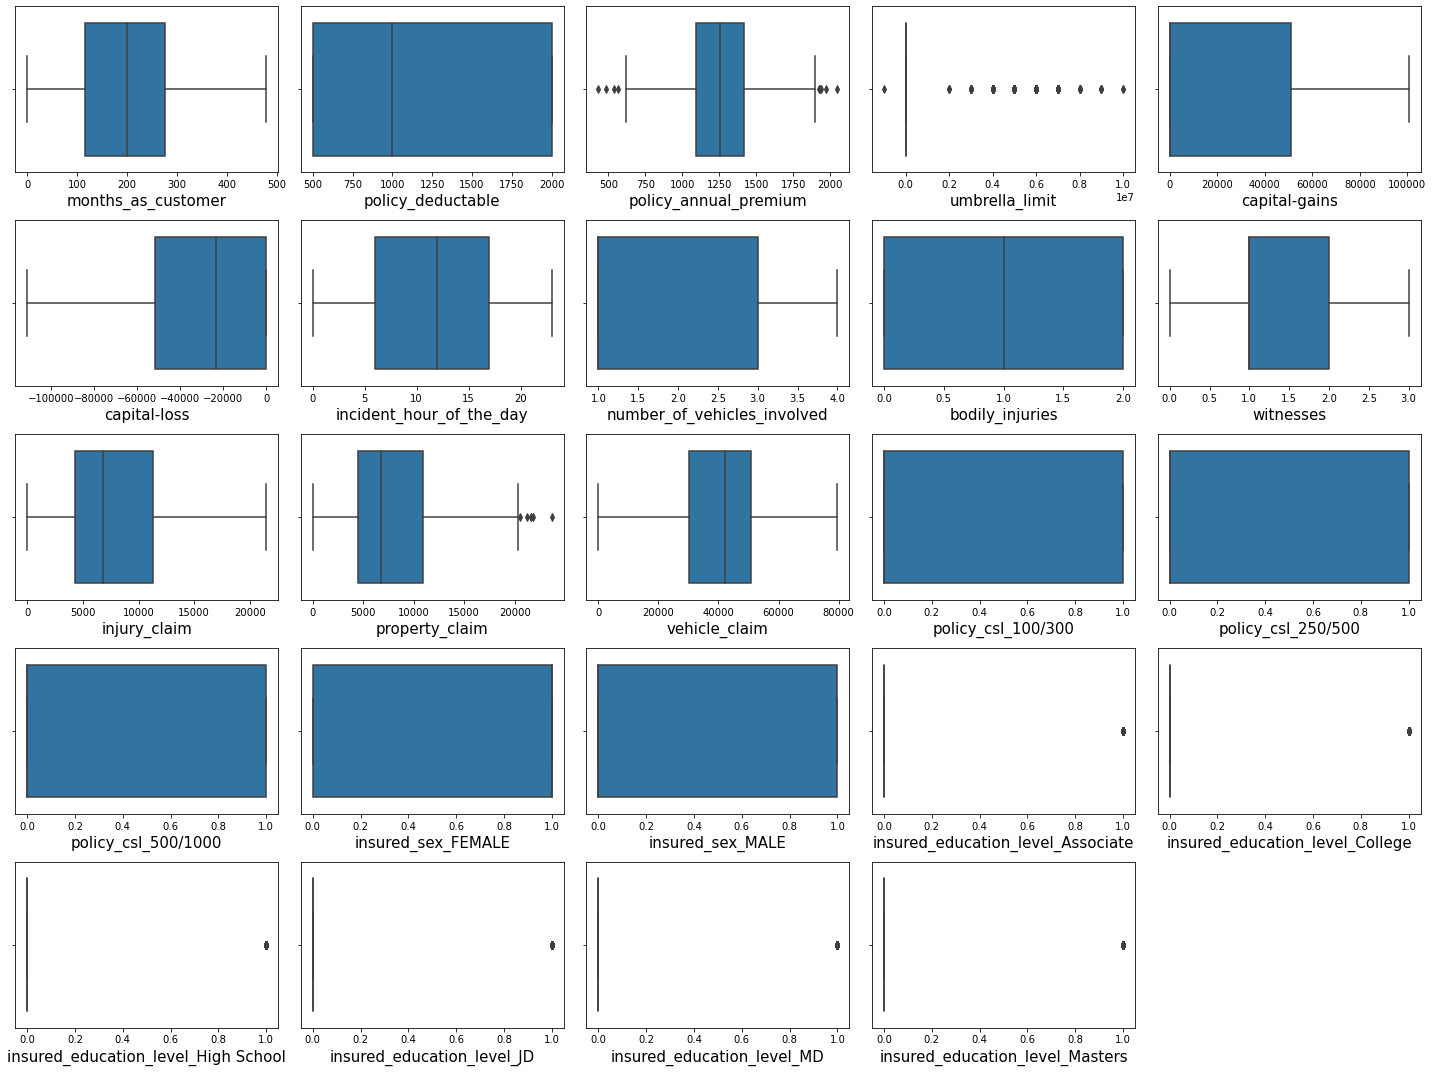

In [71]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are present in some columns 

## set variable:

In [84]:
x=df.drop(columns=['fraud_reported_Y'],axis=1)
y=df['fraud_reported_Y']


In [85]:
x.shape,y.shape

((1000, 69), (1000,))

## Transforming the data:

In [86]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.07813958, -0.22238259,  0.61670461, ..., -0.72254413,
         1.47807759, -1.74601919],
       [ 0.2089946 ,  1.41278352, -0.24252118, ..., -0.72254413,
        -0.67655447, -1.74601919],
       [-0.60800168,  1.41278352,  0.64223266, ...,  1.38399852,
        -0.67655447,  0.57273139],
       ...,
       [-0.64276748, -1.03996564,  0.52073881, ..., -0.72254413,
         1.47807759,  0.57273139],
       [ 2.20802805,  1.41278352,  0.41186558, ..., -0.72254413,
         1.47807759,  0.57273139],
       [ 2.19064515, -0.22238259, -2.00870981, ..., -0.72254413,
        -0.67655447,  0.57273139]])

In [87]:
x.mean()

1.3335548446512026e-17

In [88]:
x.std()

1.0

In [89]:
x_train,x_test,y_train,y_test =  train_test_split(x,y, test_size =0.25,random_state=100)

In [90]:
x_train.shape,y_train.shape

((750, 69), (750,))

In [91]:
x_test.shape,y_test.shape

((250, 69), (250,))

## model building:

In [92]:
LR=LinearRegression()
LR.fit(x_test,y_test)
y_pred=LR.predict(x_test)
y_pred.shape

(250,)

In [93]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
import sklearn.metrics as metrics
accuracy=metrics.r2_score(y_test,y_pred)
print('R square score',accuracy)

R square score 1.0


In [94]:
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

LogisticRegression()

In [95]:
Y_pred=model.predict(x_test)
Y_pred.shape

(250,)

In [96]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
import sklearn.metrics as metrics
accuracy=metrics.r2_score(y_test,Y_pred)
print('R square score',accuracy)

R square score 1.0


In [97]:
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[RD_model,DT_model,SV_model,KNR_model,ADA_model,GB_model ]

In [98]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  RidgeClassifier() is 100.0
Confusion Matrix of  RidgeClassifier()  is 
 [[189   0]
 [  0  61]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00        61

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 100.0
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[189   0]
 [  0  61]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00        61

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

**************************************************
Ac

## cross validation:

In [99]:
from sklearn.model_selection import cross_val_score
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  RidgeClassifier() is 100.0
cross Validation accuracy score of  RidgeClassifier()  is  100.0
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 100.0
cross Validation accuracy score of  DecisionTreeClassifier()  is  100.0
**************************************************
Accuracy_Score of  SVC() is 100.0
cross Validation accuracy score of  SVC()  is  99.9
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 83.6
cross Validation accuracy score of  KNeighborsClassifier()  is  83.3
**************************************************
Accuracy_Score of  AdaBoostClassifier() is 100.0
cross Validation accuracy score of  AdaBoostClassifier()  is  100.0
**************************************************
Accuracy_Score of  GradientBoostingClassifier() is 100.0
cross Validation accuracy score of  GradientBoostingClassifier()  is  100.0
**************************************************


## hyperparameter using Gridsearch:

In [102]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using Gridsearchcv
x_train,x_test, y_train, y_test=train_test_split(x,y, random_state = 100, test_size = 0.33)
KNN=KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
gridsearch=GridSearchCV(KNN,parameters)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_


{'n_neighbors': 21}

In [103]:
GCV_pred=gridsearch.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8363636363636363

## ROC curve:

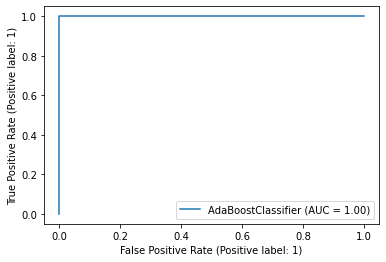

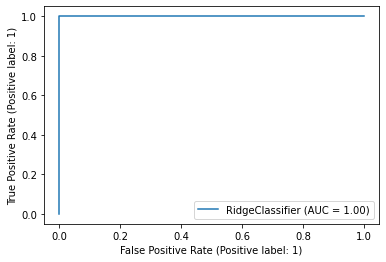

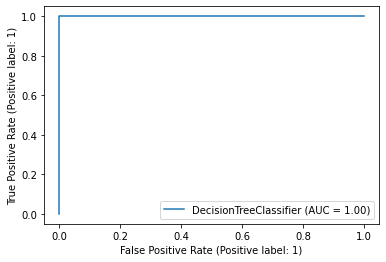

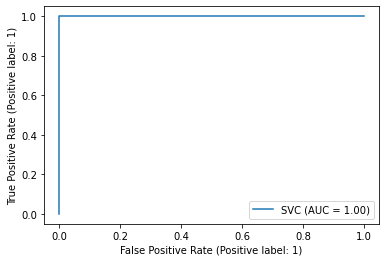

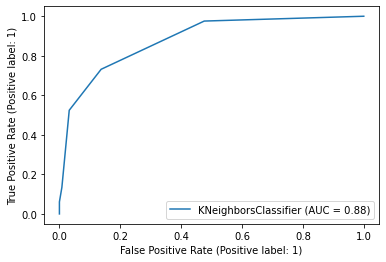

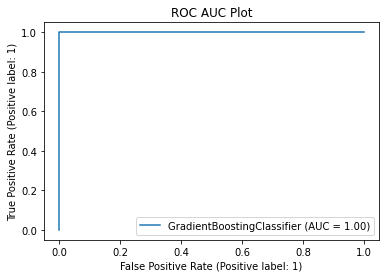

In [104]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

plot_roc_curve(ADA_model,x_test,y_test)
plot_roc_curve(RD_model,x_test,y_test)
plot_roc_curve(DT_model,x_test,y_test)
plot_roc_curve(SV_model,x_test,y_test)
plot_roc_curve(KNR_model,x_test,y_test)
plot_roc_curve(GB_model,x_test,y_test)

plt.title('ROC AUC Plot')
plt.show()

## Saving the model:

In [108]:
#Use pickle to save our model so that we can use it later

import pickle 
# Saving model to disk
pickle.dump(RD_model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

conclusion:
    each model shows 100% accuracy score except KNR_model.